In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Proyecto IA')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto IA


# **WhatKey**


Reconocimiento digital de referencias de moldes de llaves.

In [29]:
#@title WhatKey
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://www.dropbox.com/s/6jxknqdla8l8yzq/Banner%20-%20WHATKEY.jpg?dl=1", width=1250, height=700)

## Integrantes:



*   Sebastian Contreras Ceballos - 2171993
*   Jorge Garcia - codigo
*   Javier Carrillo - codigo



## Motivación

En Colombia hay registro de entre 13 y 14 millones de viviendas. Si pensamos en estas como edificaciones que cuenten con una puerta con cerradura de entrada y al menos una habitación también con su respectiva cerradura, teniendo en cuenta que frecuentemente hay al menos 2 llaves por cerradura, tenemos entonces cerca de 54 millones de llaves solo en accesos de tipo hogar, es decir, sin contar empresas, bodegas, vehículos, entre otros.

Perder estos artefactos es una de las situaciones mas molestas que con frecuencia afecta a casi toda la población mundial. Solo en Cerrajería del Sur de Bucaramanga se duplicaron diariamente una media de 83 llaves convencionales en el último mes.

Según un estudio dirigido por Ikea (una tienda de muebles y decoracion) y sigma dos(investigación para la toma de decisiones) en España la gente invierte 6.5 meses de vida buscando objetos perdidos dentro de sus casas.


## Objetivos:



*   Clasificar correctamente las referencias de los moldes de llaves utilizados
*   Cargar, tratar y almacenar óptimamente las imágenes del proyecto
*   Proponer alternativas que puedan generar mejoras en el resultado final del proyecto
*   Elegir entre las alternativas el método con mayor precisión en la clasificación


# **Importar librerias**

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 
import seaborn as sns
sns.set_theme()

(1, 7000)
7000
<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]]


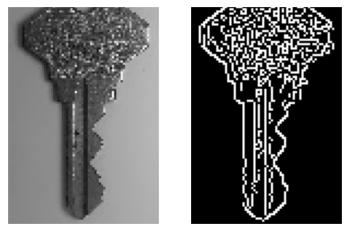

In [ ]:
I = cv2.imread("keys/datakeys/key (1).jpg", 0)

height, width = I.shape[0:2]
startRow = int(height*.2)
startCol = int(width*.3)
endRow = int(height*.8)
endCol = int(width*.7)
I = I[startRow:endRow, startCol:endCol]

I = cv2.resize(I, (70,100))
M = cv2.fastNlMeansDenoising(I)
I = cv2.Canny(M, 80,130)


plt.subplot(121), plt.imshow(M,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.subplot(122), plt.imshow(I,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

I = np.reshape(I,(1,7000))
print(I.shape)
print(np.size(I))
print(type(I))
print(I)

# Clasificando las imagenes

Para esta sección primero se leeran las imagenes con la libreria "CV2", seguido de esto se clasificaran las imagenes en numpy arrays, donde el primer array 'keys' es usado en los clasificadores y el array 'keysT' es usado en la red neuronal.

In [3]:
keys = np.zeros(shape=(184, 7000))
keysT = np.zeros(shape=(184, 100, 70))
for i in range(184):
  I = cv2.imread(f"keys/datakeys/key ({i+1}).jpg", 0)
  height, width = I.shape[0:2]
  startRow = int(height*.2)
  startCol = int(width*.3)
  endRow = int(height*.8)
  endCol = int(width*.7)
  I = I[startRow:endRow, startCol:endCol]
  I = cv2.resize(I, (70,100))
  M = cv2.fastNlMeansDenoising(I)
  keysT[i] = M
  I = np.reshape(I,(1,7000))
  keys[i] = I 

In [4]:
print("Array para los clasificadores", keys.shape)
print("Array para la red neuronal", keysT.shape)

Array para los clasificadores (184, 7000)
Array para la red neuronal (184, 100, 70)


Seguido de esto creamos un array 'label' donde contendra las etiquetas de las llaves. Dicho array lo utilizaremos para la clasificacion de las llaves en el entreno de los clasificadores.

In [7]:
labels = []
label = 0
for i in range(50):
  labels.append(label)

label += 1
for i in range(48):
  labels.append(label)

label += 1
for i in range(49):
  labels.append(label)

label += 1
for i in range(37):
  labels.append(label)

len(labels)


184

In [8]:
X = keys
y = np.array(labels)

Creamos los arrays con un 20% en el test y 80% en el train de os datos completos que utilizaremos en los clasificadores correspondientes para entrenarlos, los cuales seran los siguientes: Naive Gausean Bayes, Super Vector Classifier y Random Forest Classifier

In [9]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [10]:
print( X_train.shape, X_test.shape)
print( y_train.shape, y_test.shape)

(147, 7000) (37, 7000)
(147,) (37,)


# **Clasificadores**

# Naive gaussian bayes

In [11]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predictions_Bayes = NB.predict(X_test)

<Figure size 432x288 with 0 Axes>

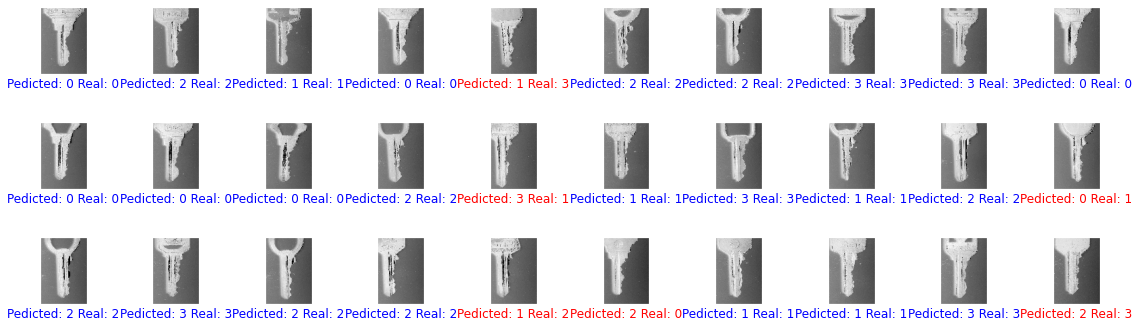

In [ ]:
#@title *code* Batch of predictions
%run Functions/dl_plot_clasificador.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_Bayes, y_test, X_test)

In [ ]:
print( "acierto en train", NB.score(X_train, y_train))
print( "acierto en test ", NB.score(X_test, y_test))

acierto en train 0.9455782312925171
acierto en test  0.7027027027027027


# Super Vector Classifier

In [12]:
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(X_train, y_train)
predictions_SVC = SVC_poly.predict(X_test)

<Figure size 432x288 with 0 Axes>

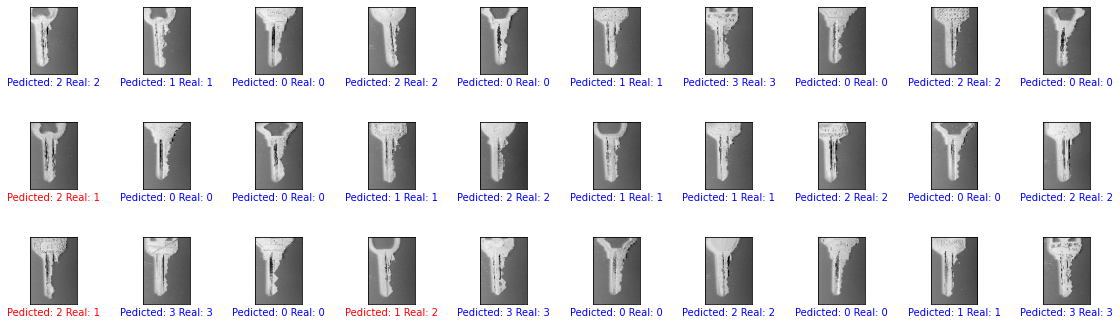

In [ ]:
%run Functions/dl_plot_clasificador.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_SVC, y_test, X_test)

In [ ]:
print( "acierto en train", SVC_poly.score(X_train, y_train))
print( "acierto en test ", SVC_poly.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.8648648648648649


# Random Forest Classifier


In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predictions_RandomForest = RFC.predict(X_test)

<Figure size 432x288 with 0 Axes>

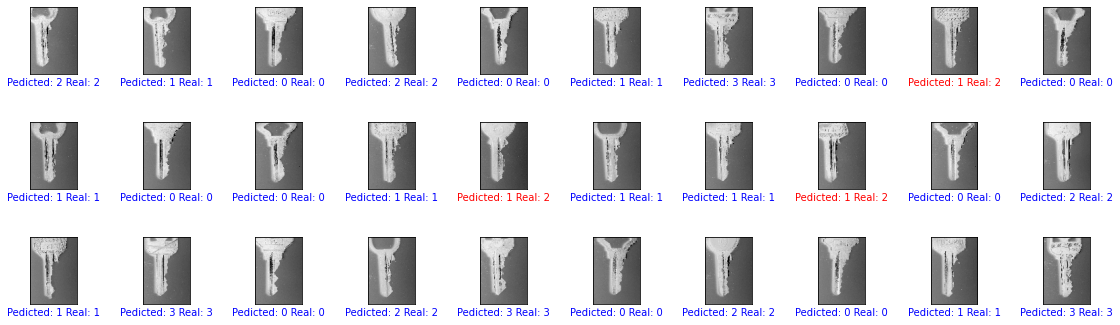

In [ ]:
%run Functions/dl_plot_clasificador.py
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_RandomForest, y_test, X_test)

In [ ]:
print( "acierto en train", RFC.score(X_train, y_train))
print( "acierto en test ", RFC.score(X_test, y_test))

acierto en train 1.0
acierto en test  0.8918918918918919


# Acierto en todo el array de imagenes por parte de los clasificadores

Naive Gausean Bayes

In [ ]:
s = cross_val_score(GaussianNB(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.750 (+/- 0.08176)


Super Vector Classifier

In [ ]:
s = cross_val_score(SVC(kernel='poly'), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.832 (+/- 0.04643)


Random Forest Classifier

In [ ]:
s = cross_val_score(RandomForestClassifier(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.880 (+/- 0.07810)


# **Deep Learning**

In [ ]:
X = keysT
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(147, 100, 70) (147,) (37, 100, 70) (37,)


In [ ]:
#@title *code* Para normalizar y preparar los datos
X_train = X_train.reshape([-1, 70, 100, 1])
X_test = X_test.reshape([-1, 70, 100, 1])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (147, 70, 100, 1)
Number of images in X_train 147
Number of images in X_test 37


In [ ]:
#@title *code* Creando la red neuronal

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[70, 100, 1]),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(512, activation=tf.nn.tanh),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 7000)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              7169024   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 516       
Total params: 7,858,564
Trainable params: 7,858,564
Non-trainable params: 0
______________________________________________

In [ ]:
#@title *code* Entrenando la red neuronal

model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
5/5 [==============================] - 1s 37ms/step - loss: 2.5655 - accuracy: 0.2584
Epoch 2/250
5/5 [==============================] - 0s 37ms/step - loss: 1.4683 - accuracy: 0.3445
Epoch 3/250
5/5 [==============================] - 0s 37ms/step - loss: 1.3876 - accuracy: 0.2827
Epoch 4/250
5/5 [==============================] - 0s 37ms/step - loss: 1.4430 - accuracy: 0.2352
Epoch 5/250
5/5 [==============================] - 0s 39ms/step - loss: 1.3830 - accuracy: 0.3249
Epoch 6/250
5/5 [==============================] - 0s 37ms/step - loss: 1.3260 - accuracy: 0.3570
Epoch 7/250
5/5 [==============================] - 0s 36ms/step - loss: 1.3264 - accuracy: 0.3610
Epoch 8/250
5/5 [==============================] - 0s 36ms/step - loss: 1.3305 - accuracy: 0.3531
Epoch 9/250
5/5 [==============================] - 0s 40ms/step - loss: 1.3406 - accuracy: 0.3460
Epoch 10/250
5/5 [==============================] - 0s 37ms/step - loss: 1.3810 - accuracy: 0.3689
Epoch 11/250
5/5 [=

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 12ms/step - loss: 0.8647 - accuracy: 0.7838
Test accuracy: 0.7837837934494019


In [ ]:
predictions = model.predict(X_test)


<Figure size 432x288 with 0 Axes>

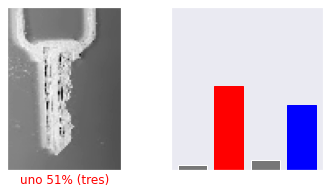

In [ ]:
%run Functions/dl_plot.py
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

<Figure size 432x288 with 0 Axes>

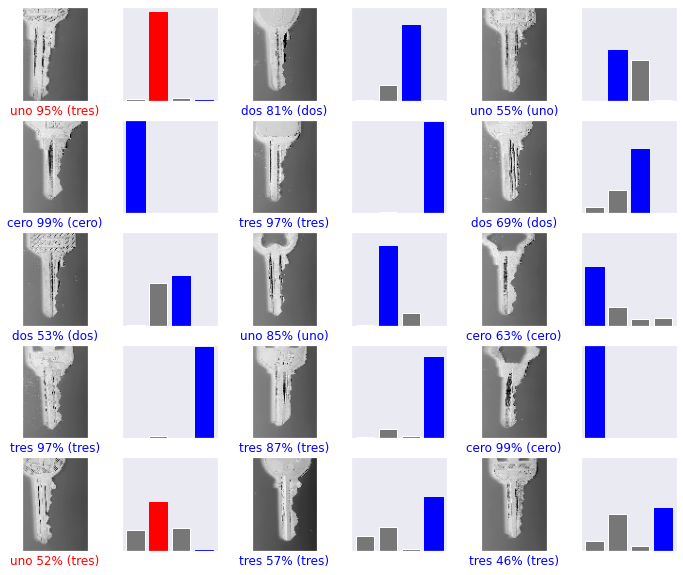

In [ ]:
#@title *code* Batch of predictions
%run Functions/dl_plot.py
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

# **Conclusiones**


*   Podemos observar que el que el metodo que obtiene un mayor procentaje de precision al clasificar las imagenes de las llaves completas es el Random Forest Calssifier con un 88.19% de precisión en el test. 
*   Al implementar la red neuronal se puede apreciar que se necesita un gran numero de epochs para obtener un buen precisión en el entramiento, a pesar de eso la precisión en las imagenes del test tienen un pesimo rendimiento comparado con el clasificador Random Forest Classifier.



